In [18]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets

##Seaborn for fancy plots. 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import geopandas as gpd
from shapely.geometry import Point
#import fiona

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

import folium # mapping
from folium.plugins import HeatMap
import scikit_posthocs as sp

>## Trying to see if there is a significant difference in Redistributing the Income_No Response and Employement_No Response columns to their Income and Education columns based on proportions.

In [19]:
df=pd.read_csv('March20_2023.csv', encoding_errors='ignore')
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df

,NGH_Name,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,...,Employment_No Response,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response
0,ABBOTTSFIELD,35,8,0,8,4,16,6,0,53.574143,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ALBANY,8,8,0,2,2,9,2,1,53.632382,...,445.0,10.0,56.0,63.0,30.0,9.0,14.0,13.0,3.0,350.0
2,ALBERTA AVENUE,123,119,1,26,13,156,99,2,53.568485,...,2342.0,601.0,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0
3,ALDERGROVE,17,19,0,6,4,46,23,0,53.516888,...,1110.0,119.0,266.0,284.0,135.0,72.0,49.0,22.0,12.0,952.0
4,ALLARD,6,17,0,1,0,12,3,4,53.401301,...,1495.0,4.0,48.0,165.0,109.0,48.0,69.0,32.0,23.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,WESTWOOD,43,34,0,7,6,53,48,1,53.575942,...,1346.0,381.0,321.0,124.0,36.0,22.0,14.0,2.0,3.0,924.0
241,WILD ROSE,14,15,0,2,2,46,24,1,53.470564,...,3020.0,32.0,198.0,273.0,125.0,100.0,96.0,34.0,18.0,1564.0
242,WINDERMERE,7,22,0,3,1,31,6,4,53.432563,...,3618.0,37.0,144.0,271.0,137.0,151.0,150.0,74.0,145.0,2027.0
243,WOODCROFT,30,22,0,13,4,40,20,4,53.564595,...,523.0,214.0,121.0,107.0,32.0,24.0,29.0,6.0,5.0,642.0


In [20]:
df.isnull().sum().sum()

0

In [21]:
df.columns

Index(['NGH_Name', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool',
       'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response',
       'Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more',
       'Income_No Response'],
      dtype='object')

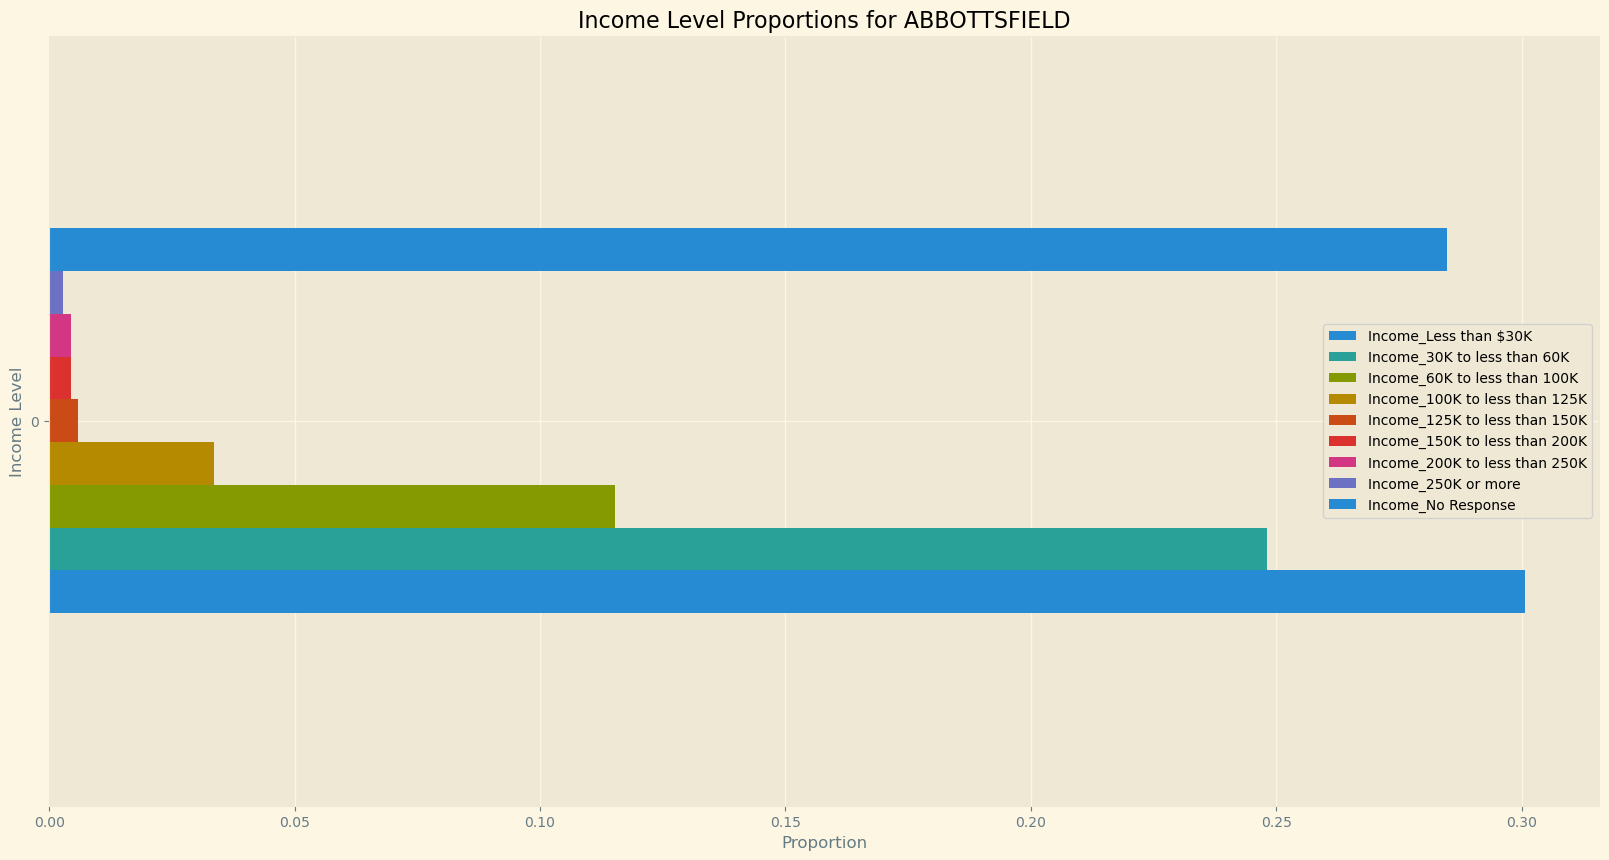

In [35]:
# Calculate the proportion of each income level category for each neighborhood
income_cols = ['Income_Less than $30K', 'Income_30K to less than 60K',
               'Income_60K to less than 100K', 'Income_100K to less than 125K',
               'Income_125K to less than 150K', 'Income_150K to less than 200K',
               'Income_200K to less than 250K', 'Income_250K or more', 'Income_No Response']
income_data_no_na = df[income_cols].dropna()
income_prop = income_data_no_na.div(income_data_no_na.sum(axis=1), axis=0)

# Select the income proportions for ABBOTTSFIELD
abbot_income_prop = income_prop.loc[df['NGH_Name'] == 'ABBOTTSFIELD']

# Create a horizontal bar chart of the income level proportions
fig, ax = plt.subplots(figsize=(20, 10))
abbot_income_prop.plot(kind='barh', ax=ax)

# Set chart title and axis labels
ax.set_title('Income Level Proportions for ABBOTTSFIELD')
ax.set_xlabel('Proportion')
ax.set_ylabel('Income Level')

# Show the chart
plt.show()

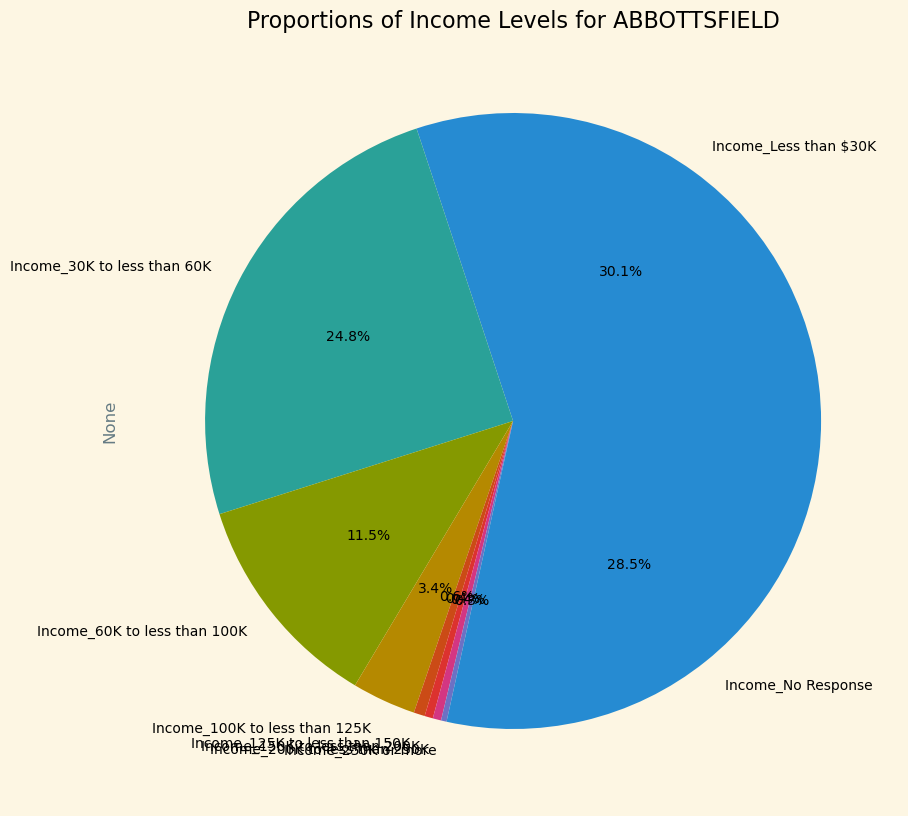

In [23]:
# Select the income columns for ABBOTTSFIELD
income_cols = ['Income_Less than $30K', 'Income_30K to less than 60K',
               'Income_60K to less than 100K', 'Income_100K to less than 125K',
               'Income_125K to less than 150K', 'Income_150K to less than 200K',
               'Income_200K to less than 250K', 'Income_250K or more', 'Income_No Response']
abbot_income = df[df['NGH_Name'] == 'ABBOTTSFIELD'][income_cols]

# Calculate the proportion of each income level category for ABBOTTSFIELD
abbot_income_prop = abbot_income.mean()

# Create a pie chart of the income level proportions
fig, ax = plt.subplots(figsize=(20, 10))
abbot_income_prop.plot.pie(ax=ax, labels=abbot_income_prop.index, autopct='%1.1f%%')

# Set chart title and axis labels
ax.set_title('Proportions of Income Levels for ABBOTTSFIELD')

# Show the chart
plt.show()

In [24]:
df2=df.copy()

This code iterates over each distinct NGH_Name value in the dataset, selects the rows for that NGH_Name, calculates the total count of "Income_No Response" for that subset, calculates the total count of all income levels (excluding "Income_No Response") for that subset, calculates the proportion of each income level category to the total income levels for that subset, redistributes the "Income_No Response" values based on the income proportions for that subset, sets "Income_No Response" to 0 for that subset, updates the subset in the original dataframe, and finally drops the "Income_No Response" column from the dataset.

In [25]:
# Iterate through each row and redistribute the Income_No Response values
for idx, row in df2.iterrows():
    # Calculate the total number of non-missing income values for this row
    total_income = row[income_cols[:-1]].sum()
    
    # If all income values are missing, skip this row
    if total_income == 0:
        continue
        
    # Calculate the proportion of each income level category for this row (excluding Income_No Response)
    income_props = row[income_cols[:-1]] / total_income
    
    # Calculate the total number of Income_No Response values for this row
    total_no_response = row['Income_No Response']
    
    # Redistribute the Income_No Response values based on each income level's proportion
    subset = row[income_cols]
    subset[income_cols[:-1]] = subset[income_cols[:-1]] + (subset['Income_No Response'] / total_no_response * income_props)
    subset['Income_No Response'] = 0
    
    # Update the row in the dataframe with the redistributed values
    df2.loc[idx, income_cols] = subset[income_cols]

# Drop the Income_No Response column
df2.drop('Income_No Response', axis=1, inplace=True)





In [26]:
df2

,NGH_Name,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,...,Permanently Unemployed,Employment_No Response,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more
0,ABBOTTSFIELD,35,8,0,8,4,16,6,0,53.574143,...,48.0,499.0,206.420408,170.346939,79.161224,23.046939,4.008163,3.006122,3.006122,2.004082
1,ALBANY,8,8,0,2,2,9,2,1,53.632382,...,16.0,445.0,10.050505,56.282828,63.318182,30.151515,9.045455,14.070707,13.065657,3.015152
2,ALBERTA AVENUE,123,119,1,26,13,156,99,2,53.568485,...,171.0,2342.0,601.314825,667.349398,364.190676,139.072813,62.032478,61.031954,11.005762,4.002095
3,ALDERGROVE,17,19,0,6,4,46,23,0,53.516888,...,61.0,1110.0,119.124088,266.277372,284.296142,135.140772,72.075078,49.051095,22.022941,12.012513
4,ALLARD,6,17,0,1,0,12,3,4,53.401301,...,5.0,1495.0,4.008032,48.096386,165.331325,109.218876,48.096386,69.138554,32.064257,23.046185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,WESTWOOD,43,34,0,7,6,53,48,1,53.575942,...,101.0,1346.0,381.421927,321.355482,124.137320,36.039867,22.024363,14.015504,2.002215,3.003322
241,WILD ROSE,14,15,0,2,2,46,24,1,53.470564,...,50.0,3020.0,32.036530,198.226027,273.311644,125.142694,100.114155,96.109589,34.038813,18.020548
242,WINDERMERE,7,22,0,3,1,31,6,4,53.432563,...,23.0,3618.0,37.033363,144.129847,271.244364,137.123535,151.136159,150.135257,74.066727,145.130748
243,WOODCROFT,30,22,0,13,4,40,20,4,53.564595,...,36.0,523.0,214.397770,121.224907,107.198885,32.059480,24.044610,29.053903,6.011152,5.009294


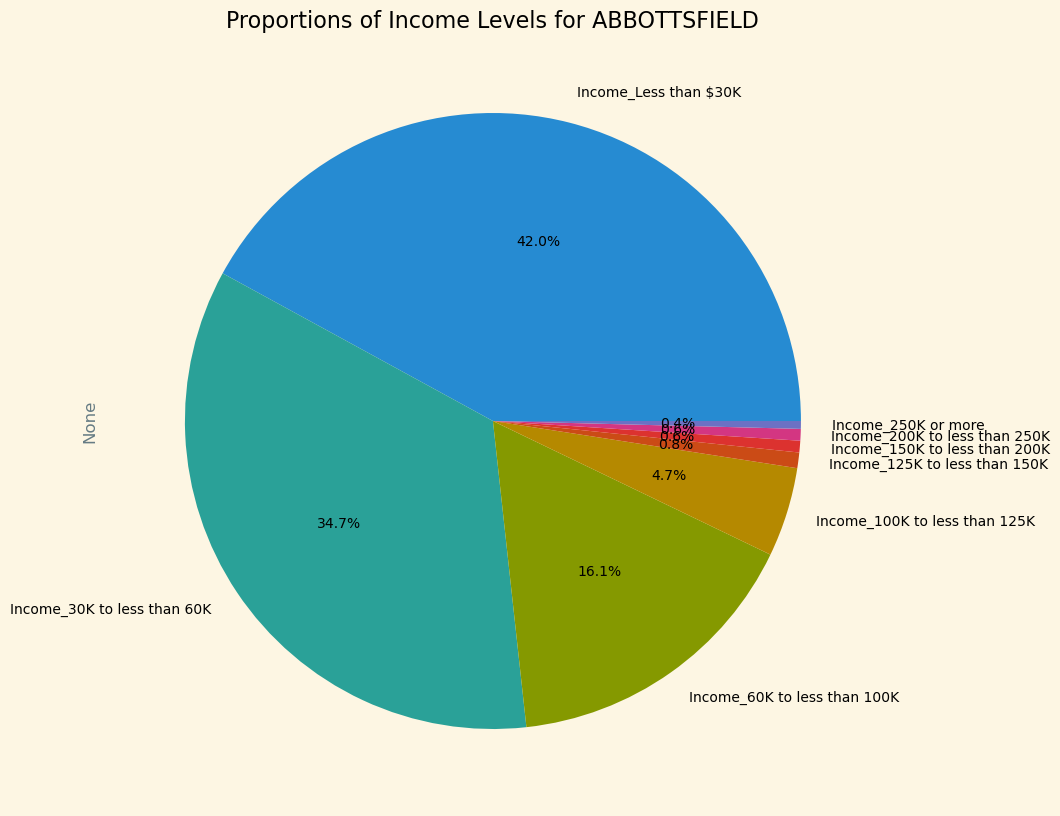

In [27]:
# Select the income columns for ABBOTTSFIELD
income_cols = ['Income_Less than $30K', 'Income_30K to less than 60K',
               'Income_60K to less than 100K', 'Income_100K to less than 125K',
               'Income_125K to less than 150K', 'Income_150K to less than 200K',
               'Income_200K to less than 250K', 'Income_250K or more']
abbot_income = df2[df2['NGH_Name'] == 'ABBOTTSFIELD'][income_cols]

# Calculate the proportion of each income level category for ABBOTTSFIELD
abbot_income_prop = abbot_income.mean()

# Create a pie chart of the income level proportions
fig, ax = plt.subplots(figsize=(20, 10))
abbot_income_prop.plot.pie(ax=ax, labels=abbot_income_prop.index, autopct='%1.1f%%')

# Set chart title and axis labels
ax.set_title('Proportions of Income Levels for ABBOTTSFIELD')

# Show the chart
plt.show()

In [28]:
df.describe().T[22:]

,count,mean,std,min,25%,50%,75%,max
Income_Less than $30K,245.0,117.273469,164.175120,2.0,33.0,69.0,133.0,1413.0
Income_30K to less than 60K,245.0,181.897959,161.442783,4.0,87.0,148.0,238.0,1611.0
Income_60K to less than 100K,245.0,189.930612,154.871044,3.0,95.0,163.0,236.0,1505.0
Income_100K to less than 125K,245.0,88.563265,74.465700,1.0,43.0,72.0,103.0,537.0
Income_125K to less than 150K,245.0,56.371429,48.018661,1.0,27.0,44.0,66.0,355.0
Income_150K to less than 200K,245.0,54.685714,50.395111,2.0,23.0,42.0,65.0,393.0
Income_200K to less than 250K,245.0,23.187755,22.560607,1.0,7.0,16.0,31.0,133.0
Income_250K or more,245.0,23.424490,29.617220,1.0,4.0,12.0,27.0,145.0
Income_No Response,245.0,721.861224,645.751542,91.0,376.0,570.0,855.0,6716.0


In [29]:
df2.describe().T[22:]

,count,mean,std,min,25%,50%,75%,max
Income_Less than $30K,245.0,117.416513,164.243796,2.006192,33.059246,69.071577,133.156287,1413.244252
Income_30K to less than 60K,245.0,182.135913,161.483631,4.210526,87.240997,148.302658,238.192401,1611.278479
Income_60K to less than 100K,245.0,190.187156,154.886393,3.157895,95.320946,163.381733,236.312583,1505.260156
Income_100K to less than 125K,245.0,88.686552,74.480377,1.052632,43.053086,72.101983,103.108995,537.092826
Income_125K to less than 150K,245.0,56.452281,48.032905,1.052632,27.109756,44.078712,66.108374,355.133559
Income_150K to less than 200K,245.0,54.766345,50.415664,2.105263,23.038983,42.057299,65.201238,393.147856
Income_200K to less than 250K,245.0,23.224164,22.576497,1.007092,7.012567,16.041131,31.046200,133.050038
Income_250K or more,245.0,23.465770,29.656152,1.001031,4.007117,12.012766,27.037604,145.130748


This code iterates over each distinct NGH_Name value in the dataset, selects the rows for that NGH_Name, calculates the total count of "Education_No Response" for that subset, calculates the total count of all education levels (excluding "Education_No Response") for that subset, calculates the proportion of each education level category to the total education levels for that subset, redistributes the "Education_No Response" values based on the education proportions for that subset, sets "Education_No Response" to 0 for that subset, updates the subset in the original dataframe, and finally drops the "Education_No Response" column from the dataset.

In [30]:
# Select the educational columns
employment_cols = ['Homemaker', 'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired', 'Permanently Unemployed', 'Employment_No Response']

# Iterate through each row and redistribute the Employment_No Response values
for idx, row in df2.iterrows():
    # Calculate the total number of non-missing employment values for this row
    total_employment = row[employment_cols[:-1]].sum()

    # If all employment values are missing, skip this row
    if total_employment == 0:
        continue

    # Calculate the proportion of each employment category for this row (excluding Employment_No Response)
    employment_props = row[employment_cols[:-1]] / total_employment

    # Calculate the total number of Employment_No Response values for this row
    total_no_response = row['Employment_No Response']

    # Redistribute the Employment_No Response values based on each employment category's proportion
    subset = row[employment_cols]
    subset[employment_cols[:-1]] = subset[employment_cols[:-1]] + (subset['Employment_No Response'] / total_no_response * employment_props)
    subset['Employment_No Response'] = 0

    # Update the row in the dataframe with the redistributed values
    df2.loc[idx, employment_cols] = subset[employment_cols]

# Drop the Employment_No Response column
df2.drop('Employment_No Response', axis=1, inplace=True)


In [31]:
df.describe().T[15:22]

,count,mean,std,min,25%,50%,75%,max
Homemaker,245.0,81.620408,59.896280,3.0,40.0,68.0,104.0,398.0
Employed 0-30,245.0,163.771429,99.170684,4.0,101.0,146.0,204.0,667.0
Employed 30+,245.0,1019.297959,713.234773,21.0,558.0,867.0,1249.0,5465.0
Unemployed,245.0,130.893878,95.016980,1.0,62.0,112.0,185.0,554.0
Retired,245.0,330.893878,223.405784,14.0,197.0,298.0,429.0,2343.0
Permanently Unemployed,245.0,34.281633,36.257592,1.0,12.0,25.0,43.0,258.0
Employment_No Response,245.0,1177.028571,962.061335,80.0,558.0,980.0,1495.0,7636.0


In [32]:
df2.describe().T[15:21]

,count,mean,std,min,25%,50%,75%,max
Homemaker,245.0,81.666464,59.906347,3.065217,40.070796,68.033531,104.046018,398.064516
Employed 0-30,245.0,163.864965,99.174263,4.086957,101.103061,146.088218,204.102616,667.071041
Employed 30+,245.0,1019.866270,713.266677,21.456522,558.504065,867.636564,1249.533761,5465.582064
Unemployed,245.0,130.965722,95.034720,1.021739,62.047401,112.063781,185.103007,554.059005
Retired,245.0,331.094794,223.441026,14.304348,197.187619,298.163020,429.306429,2343.249547
Permanently Unemployed,245.0,34.300969,36.270741,1.000964,12.012807,25.006760,43.027198,258.080324


In [33]:
abots_df=df[df['NGH_Name']=='ABBOTTSFIELD'] 
abots_df

,NGH_Name,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,...,Employment_No Response,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response
0,ABBOTTSFIELD,35,8,0,8,4,16,6,0,53.574143,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0


In [34]:
abots_df2=df2[df2['NGH_Name']=='ABBOTTSFIELD'] 
abots_df2

,NGH_Name,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,...,Retired,Permanently Unemployed,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more
0,ABBOTTSFIELD,35,8,0,8,4,16,6,0,53.574143,...,80.08879,48.053274,206.420408,170.346939,79.161224,23.046939,4.008163,3.006122,3.006122,2.004082


 It is possible that the redistribution of the No_Response columns did not have a significant impact on this particular data